# Descriptive Statistics and Inferential Statistics

1. Descirptive Statistics
    1.1 DS
    1.2 Conclusion

2. Compare Cities
    
    2.1 Price
   
    2.2 Size (Rooms and m2)


3. Distribution of Publication Date


4. Price

            correlation with size and room number and also floor


5. Additional Ideas / Plots
    
    5.1 most common features (just a plot in tableau)
    

In [87]:
import math
import time
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway
from scipy import stats

In [88]:
ds= pd.read_csv('./Data/c_flats_clean.csv', index_col=0)
ds.head()

object_type   price  price_wo_extras  extras   size  rooms  floor  \
23016581     Wohnung  1480.0           1240.0   240.0   68.0    3.0    2.0   
23016600     Wohnung  3500.0           3200.0   300.0  140.0    5.0    2.0   
23014342     Wohnung  1710.0           1470.0   240.0   73.0    3.5    NaN   
23017350     Wohnung  1180.0           1030.0   150.0    NaN    2.0    1.0   
23016559     Wohnung  1360.0           1230.0   130.0   44.0    2.5    3.0   

              moovIn  balcony  lift  ...     age  parking_out  pets_allowed  \
23016581  01.05.2020      1.0   1.0  ...     NaN          NaN           NaN   
23016600  01.05.2020      1.0   1.0  ...     NaN          NaN           NaN   
23014342  01.03.2020      1.0   1.0  ...  1965.0          1.0           1.0   
23017350  01.05.2020      1.0   NaN  ...     NaN          NaN           NaN   
23016559  01.06.2020      NaN   NaN  ...  1600.0          NaN           NaN   

           tv kids_ok     KG     PS     SS  highway  parking_in  
23016581  NaN     NaN    NaN    NaN    NaN      NaN         NaN  
23016600  NaN     NaN    NaN    NaN    NaN      NaN         NaN  
23014342  1.0     1.0  700.0  700.0  700.0      NaN         NaN  
23017350  NaN     NaN  350.0    NaN    NaN   1000.0         NaN  
23016559  1.0     NaN    NaN    NaN    NaN      NaN         NaN  

[5 rows x 27 columns]

# 1. Descriptive Statistics

### 1.1 DS

In [89]:
#pip install pandas-profiling[notebook,html]

In [90]:
from pandas_profiling import ProfileReport

In [91]:
profile = ProfileReport(ds, title='Pandas Profiling Report')

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))


In [92]:
profile.to_notebook_iframe()

## 2.1 Conclusions from DS

- dublicates droped
- correlations btw. prices ok, no others discovered

Descriptive:
- adress: often not precise enough to locate to one point(because road is missing). Could check if really only in the cities? or also outside? suburban areas?
- age: a lot of missings, only some very old ones --> drop outliers when looking at age
- balcony, only 50% missings
- city: split btw. city
- only 2/3 split cost in extras _ non extras --> focus on rent, not on splittet cost (no added value)
- floor: for 3/4 available: good!  --> drop outliers when looking at age
- highway: log normal distributed, but a lot of missings
- same for KG, PS, SS
- kids_ok, lift, parking_in, parking_out, pets_allowed, public transport, shopping: good for yes or no analysis
- moovIn: mix btw. str and date, but could be usefull for analysis, but probably not in this analysis
- object type: important to know, because i only wanted to have flats... -->> drop!!!! ok, done in cleaning. however, "wohnung" is a supercategory of the rest, so thats why a distinction is probably delicate
- price: droped outliers downwoards, but not upwards --> keep in mind
- publication date: distribution? 10% missings, but still useful
- rating could be interesting, but a lot of missings... --> not in the focus
- rooms: expected distribution. --> good to use, not a lot of missings
- size: 1/4 missings, but still usefull. Normal distributed?

Correlation:
- extras and size: logisch
- prize: size and rooms, but also floor (probably not linear, but could be interesting to do a taylor approximation (or however it is called)

# 2. Compare Cities

    2.1 Price
    2.2 Size (Rooms and m2)


## 2.1 Differences t-stat

In [93]:
ds.groupby('city').mean()

price  price_wo_extras      extras       size     rooms  \
city                                                                     
bern     1723.267356      1633.508982  231.259481  76.510158  2.827663   
luzern   1945.738872      1757.939446  216.356401  83.350626  3.305349   
zuerich  2411.639785      2451.014587  241.505673  78.261939  2.793831   

            floor  balcony  lift  public_transport    shopping  ...  \
city                                                            ...   
bern     2.546778      1.0   1.0        224.945455  364.439114  ...   
luzern   2.842105      1.0   1.0        175.370056  385.796512  ...   
zuerich  2.347280      1.0   1.0        169.942529  394.020057  ...   

                 age  parking_out  pets_allowed   tv  kids_ok          KG  \
city                                                                        
bern     1956.818653          1.0           1.0  1.0      1.0  578.825301   
luzern   1972.864865          1.0           1.0  1.0      1.0  463.069767   
zuerich  1975.431169          1.0           1.0  1.0      1.0  355.946341   

                 PS          SS      highway  parking_in  
city                                                      
bern     572.742331  974.493976  1299.083333         1.0  
luzern   551.064103  883.427632  1882.584795         1.0  
zuerich  456.509901  741.606452  1837.312500         1.0  

[3 rows x 21 columns]

In [94]:
ds.pivot_table(index=["city"], values=['price', "rooms","size"], aggfunc= { 'price': np.mean,'rooms':np.mean,  'size':np.mean}, fill_value='-')

price     rooms       size
city                                     
bern     1723.267356  2.827663  76.510158
luzern   1945.738872  3.305349  83.350626
zuerich  2411.639785  2.793831  78.261939

### 2.1.1 test one city against "the rest"

<font color='red'>remark:</font> see barplot in tableau: https://public.tableau.com/profile/elvira2175#!/vizhome/project4_15828371924160/bar_per_cit?publish=yes

and fig1_tabl

In [95]:
measure = ['price', 'rooms', 'size']

In [96]:
city= ds['city'].unique()

In [97]:
### remark: all the tests are for alpha = 5% 

def t_test (city, measureList): 
    ds_city= ds[ds['city']==city][measureList].dropna()
    ds_notcity= ds[ds['city']!=city][measureList].dropna()
    dic = {}
    for m in measureList:
        dic[m] = [round(ttest_ind(ds_city[m], ds_notcity[m])[0],2),round(ttest_ind(ds_city[m], ds_notcity[m])[1],3) ] 
    return dic

def t_test_other (city, othercity, measureList): 
    ds_city= ds[ds['city']==city][measureList].dropna()
    ds_othercity= ds[ds['city']==othercity][measureList].dropna()
    dic = {}
    for m in measureList:
        dic[m] = [round(ttest_ind(ds_city[m], ds_othercity[m])[0],2),round(ttest_ind(ds_city[m], ds_othercity[m])[1],3) ] 
    return dic

#### a) Bern

In [98]:

t_test('bern', measure)
## significant differences bern against the others only regarding price (lower)

{'price': [-7.95, 0.0], 'rooms': [-1.94, 0.052], 'size': [-1.94, 0.052]}

In [99]:
### also compared to asingle city?

print('luzern', t_test_other ('bern', 'luzern', measure))
print('zuerich', t_test_other ('bern', 'zuerich', measure))
### similar toe zuerich regarting rooms

luzern {'price': [-2.94, 0.003], 'rooms': [-5.04, 0.0], 'size': [-3.09, 0.002]}
zuerich {'price': [-10.81, 0.0], 'rooms': [0.72, 0.471], 'size': [-0.76, 0.446]}


#### b) Luzern

In [100]:
t_test('luzern', measure)
## significant differences luzer against the others (lower prices and more rooms)

{'price': [-5.27, 0.0], 'rooms': [6.32, 0.0], 'size': [2.98, 0.003]}

In [101]:
print('luzern', 'bern', t_test_other ('luzern', 'bern', measure))
print('luzern', 'zuerich', t_test_other ('luzern', 'zuerich', measure))

luzern bern {'price': [2.94, 0.003], 'rooms': [5.04, 0.0], 'size': [3.09, 0.002]}
luzern zuerich {'price': [-8.9, 0.0], 'rooms': [5.93, 0.0], 'size': [2.28, 0.023]}


#### c) Zuerich

In [102]:
t_test('zuerich', measure)
## significant differences zuerich against the others (higher prices and less rooms)

{'price': [12.52, 0.0], 'rooms': [-4.26, 0.0], 'size': [-1.11, 0.266]}

In [103]:
print('zuerich', 'bern', t_test_other ('zuerich', 'bern', measure))
print('zuerich', 'luzern', t_test_other ('zuerich', 'luzern', measure))

zuerich bern {'price': [10.81, 0.0], 'rooms': [-0.72, 0.471], 'size': [0.76, 0.446]}
zuerich luzern {'price': [8.9, 0.0], 'rooms': [-5.93, 0.0], 'size': [-2.28, 0.023]}


##### b) ANOVA

In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(city)', data=ds).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

### conclusion for plot:  price: signifiant difference among each others (same as above)

sum_sq      df          F        PR(>F)
C(city)   2.003457e+08     2.0  86.732372  4.987346e-37
Residual  2.631010e+09  2278.0        NaN           NaN

In [105]:
model = ols('rooms ~ C(city)', data=ds).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

### there are differences regarding the room

sum_sq      df          F        PR(>F)
C(city)    117.569266     2.0  39.760197  1.066435e-17
Residual  3356.148288  2270.0        NaN           NaN

In [106]:
model = ols('size ~ C(city)', data=ds).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
### there are differences regarding the size

sum_sq      df         F    PR(>F)
C(city)   1.330723e+04     2.0  4.747291  0.008791
Residual  2.368638e+06  1690.0       NaN       NaN

### 2.2.2  price for different numbers of room

In [107]:

def t_test_roomsize (roomsize):
    cities= ds['city'].unique()
    dic = {}
    for c in cities:
        ds_city= ds[(ds['city']==c) & (ds['rooms']==roomsize)]['price'].dropna()
        ds_notcity= ds[(ds['city']!=c) & (ds['rooms']==roomsize)]['price'].dropna()
        dic[c] = [round(ttest_ind(ds_city, ds_notcity)[0],2),round(ttest_ind(ds_city, ds_notcity)[1],3) ] 
    return dic

In [108]:
dictroom = {}
for x in sorted(ds['rooms'].unique())[:-6]:
    dictroom[x] = t_test_roomsize(x)
dictroom

dictroom = pd.DataFrame.from_dict(dictroom, orient='index').dropna()
dictroom

bern        zuerich          luzern
1.0  [-2.77, 0.006]    [5.02, 0.0]  [-3.32, 0.001]
1.5  [-2.66, 0.009]  [2.99, 0.003]   [-0.83, 0.41]
2.0  [-2.43, 0.016]    [4.92, 0.0]  [-2.53, 0.012]
2.5    [-7.86, 0.0]   [12.79, 0.0]    [-4.27, 0.0]
3.0    [-4.83, 0.0]   [10.59, 0.0]    [-4.66, 0.0]
3.5     [-5.4, 0.0]   [14.31, 0.0]    [-7.46, 0.0]
4.0  [-1.24, 0.219]    [4.85, 0.0]    [-3.65, 0.0]
4.5  [-2.79, 0.006]    [9.09, 0.0]    [-5.63, 0.0]
5.0   [-1.7, 0.108]  [0.12, 0.902]   [1.67, 0.113]
5.5   [-0.81, 0.42]   [3.6, 0.001]  [-2.79, 0.007]

<font color='red'>remakr:</font> plot in tableau, bellow: reshaping as input for tablau: https://public.tableau.com/profile/elvira2175#!/vizhome/project4_15828371924160/bar_per_cit?publish=yes

fig2_tabl

In [157]:
cds=ds.pivot_table(index=["city"], columns=["rooms"], values=['price'], aggfunc= { 'price': np.mean,}, fill_value='-')
cds=cds.transpose()
cds

city            bern   luzern  zuerich
      rooms                           
price 1.0    951.633  853.698  1169.93
      1.5    1253.63  1398.53  1655.19
      2.0    1454.96  1392.64  1849.78
      2.5    1579.47  1703.64  2388.73
      3.0    1670.42  1627.01  2244.18
      3.5    1934.49  1931.14  2858.74
      4.0    2160.42   1934.7   2855.2
      4.5    2553.27  2449.56  3694.84
      5.0    3154.38   4852.5     3999
      5.5       3495  3187.74  5049.56
      6.0       2880  4253.57     6013
      6.5          -     5310   4647.5
      7.0       4550        -  5486.67
      7.5       4650        -     5374
      8.0          -     6900        -
      12.5         -        -     6560

## 3. Nr of announcements per day

In [110]:
ds.columns

Index(['object_type', 'price', 'price_wo_extras', 'extras', 'size', 'rooms',
       'floor', 'moovIn', 'balcony', 'lift', 'public_transport', 'shopping',
       'rating', 'adress', 'publication_date', 'city', 'DateofScrapping',
       'age', 'parking_out', 'pets_allowed', 'tv', 'kids_ok', 'KG', 'PS', 'SS',
       'highway', 'parking_in'],
      dtype='object')

(array([943., 512., 162.,  81.,  50.,  67.,  35.,  31.,  24.,  22.]),
 array([  0.,  19.,  38.,  57.,  76.,  95., 114., 133., 152., 171., 190.]),
 <a list of 10 Patch objects>)

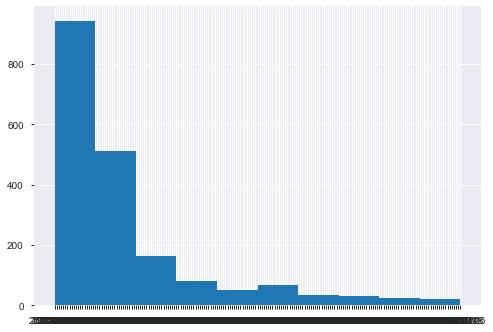

In [111]:
pubdate = ds[ds['publication_date'].isna()==False]
plt.hist('publication_date', data=pubdate)

### is it geometrically distributed?

## 3.1 All cities

In [112]:
### test goodnes of fit
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import geom

In [113]:
pub_freq=pubdate.groupby('publication_date').agg({'city':'count'}).rename(columns={'city':'counts'})
pub_freq=pub_freq.reset_index()

### a) assing a in for "nr of days on platform" instead of date:

In [114]:
pub_freq['publication_date'].min()
pub_freq['publication_date'].max()

'2020-02-26'

In [115]:
dates =pd.date_range(start=pub_freq['publication_date'].min(), end=pub_freq['publication_date'].max())
dates.shape[0]

dictdate = {"20"+str(dates[x].strftime('%y-%m-%d')): dates.shape[0]-x for x in range(dates.shape[0]) }
dictdate

{'2019-01-16': 407,
 '2019-01-17': 406,
 '2019-01-18': 405,
 '2019-01-19': 404,
 '2019-01-20': 403,
 '2019-01-21': 402,
 '2019-01-22': 401,
 '2019-01-23': 400,
 '2019-01-24': 399,
 '2019-01-25': 398,
 '2019-01-26': 397,
 '2019-01-27': 396,
 '2019-01-28': 395,
 '2019-01-29': 394,
 '2019-01-30': 393,
 '2019-01-31': 392,
 '2019-02-01': 391,
 '2019-02-02': 390,
 '2019-02-03': 389,
 '2019-02-04': 388,
 '2019-02-05': 387,
 '2019-02-06': 386,
 '2019-02-07': 385,
 '2019-02-08': 384,
 '2019-02-09': 383,
 '2019-02-10': 382,
 '2019-02-11': 381,
 '2019-02-12': 380,
 '2019-02-13': 379,
 '2019-02-14': 378,
 '2019-02-15': 377,
 '2019-02-16': 376,
 '2019-02-17': 375,
 '2019-02-18': 374,
 '2019-02-19': 373,
 '2019-02-20': 372,
 '2019-02-21': 371,
 '2019-02-22': 370,
 '2019-02-23': 369,
 '2019-02-24': 368,
 '2019-02-25': 367,
 '2019-02-26': 366,
 '2019-02-27': 365,
 '2019-02-28': 364,
 '2019-03-01': 363,
 '2019-03-02': 362,
 '2019-03-03': 361,
 '2019-03-04': 360,
 '2019-03-05': 359,
 '2019-03-06': 358,


In [116]:
pub_freq['nr_day'] = pub_freq['publication_date'].map(dictdate)
pub_freq['nr_day']
pub_freq.head()

publication_date  counts  nr_day
0       2019-01-16       1     407
1       2019-02-01       1     391
2       2019-02-18       1     374
3       2019-02-26       1     366
4       2019-03-01       2     363

#### b) calculate mean

In [117]:
pub_freq['weighted_counts'] =pub_freq['nr_day']*pub_freq['counts']
mean_cal = pub_freq['weighted_counts'].sum()/pub_freq['counts'].sum()

In [118]:
mean_cal

39.483134405812145

#### d) exponential function

In [149]:
p = 1/mean_cal
mean, var, skew, kurt = geom.stats(p, moments='mvsk')
mean

geom.pmf(4, p)
func=geom(p)

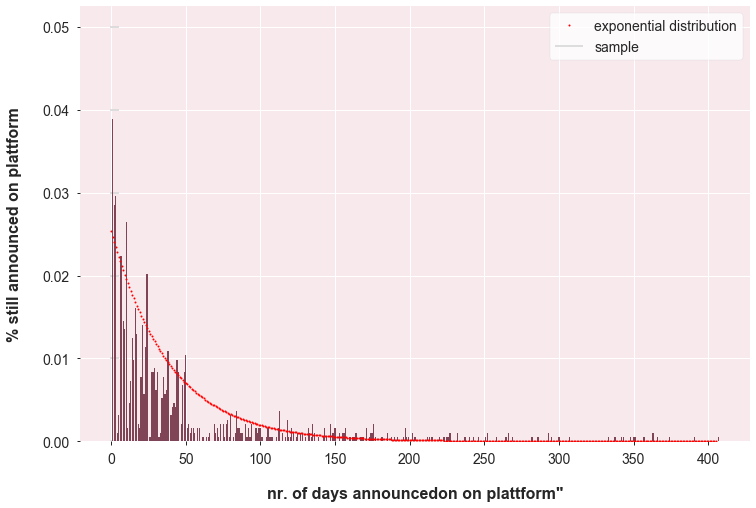

In [159]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0.933+0.04,0.8745+0.04,0.89+0.04)) ## white background

ax.tick_params(axis='both', labelsize=14)
x = np.arange(1,pub_freq['nr_day'].max())
plt.plot(geom.pmf(x,p),'bo', ms=2, label='geom pmf',color='red')
plt.bar(pub_freq['nr_day'],pub_freq['counts']/pub_freq['counts'].sum(), color=(0.502, 0.266,0.341))

plt.hlines(y=(0,0.01, 0.02,0.03,0.04,0.05,), xmin=-0.5, xmax=5.5, color=[(0.85,0.85,0.85)], zorder=1) ## grey horizontal lines
plt.xlabel('nr. of days announcedon on plattform"', fontsize ='16', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('% still announced on plattform', fontsize ='16', fontweight='bold', fontname="Arial", labelpad = 20)
plt.legend(['exponential distribution', 'sample'],fontsize ='14',frameon= True, facecolor='white')
plt.savefig('./Figures/fig1_dist.png', bbox_inches='tight')

#### e) check goodness of fit

In [121]:
from scipy.stats import chisquare
chisquare(pub_freq['counts']/pub_freq['counts'].sum(), f_exp=geom.pmf(pub_freq['nr_day'],p))

Power_divergenceResult(statistic=2.8914873092385345, pvalue=1.0)

In [156]:
observed_values=pub_freq['counts']/pub_freq['counts'].sum()
expected_values=geom.pmf(pub_freq['nr_day'],p)

chi = sum((observed_values - expected_values)**2 / expected_values)   # fill with code and data
dof = pub_freq['counts'].sum()-1
alpha = 0.05

critical_value = stats.chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")
critical_value

Null hypothesis can't be rejected


2029.2113094260997

### 3.2 distinct mean

In [122]:
pub_freq=pubdate.groupby(['publication_date','city']).agg({'city':'count'}).rename(columns={'city':'counts'})
pub_freq=pub_freq.reset_index()
pub_freq

publication_date     city  counts
0         2019-01-16   luzern       1
1         2019-02-01   luzern       1
2         2019-02-18   luzern       1
3         2019-02-26   luzern       1
4         2019-03-01   luzern       2
..               ...      ...     ...
314       2020-02-25   luzern       7
315       2020-02-25  zuerich      55
316       2020-02-26     bern       4
317       2020-02-26   luzern      19
318       2020-02-26  zuerich      75

[319 rows x 3 columns]

In [123]:
## assing days with dict from above
dictdate
pub_freq['nr_day'] = pub_freq['publication_date'].map(dictdate)



In [124]:
## t stats:
pub_freq_lu = pub_freq[pub_freq['city']=='luzern'][['nr_day','counts']]
pub_freq_be = pub_freq[pub_freq['city']=='bern'][['nr_day','counts']]
pub_freq_zh = pub_freq[pub_freq['city']=='zuerich'][['nr_day','counts']]




In [125]:
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ttest_ind as w_ttest_ind


In [126]:
## t-test
w_ttest_ind(pub_freq_lu['nr_day'], pub_freq_be['nr_day'], usevar='unequal', weights=(pub_freq_lu['counts'], pub_freq_be['counts']))
w_ttest_ind(pub_freq_zh['nr_day'], pub_freq_be['nr_day'], usevar='unequal', weights=(pub_freq_zh['counts'], pub_freq_be['counts']))
w_ttest_ind(pub_freq_zh['nr_day'], pub_freq_lu['nr_day'], usevar='unequal', weights=(pub_freq_zh['counts'], pub_freq_lu['counts']))

(-15.646766503206294, 5.490988621128271e-47, 641.9462093789452)

In [127]:
## means
dzh = DescrStatsW(pub_freq_zh['nr_day'], weights=pub_freq_zh['counts'])
dbe = DescrStatsW(pub_freq_be['nr_day'], weights=pub_freq_be['counts'])
dlu = DescrStatsW(pub_freq_lu['nr_day'], weights=pub_freq_lu['counts'])
dzh.mean
dbe.mean
dlu.mean

66.82295081967213

In [128]:
## for plot
means_days = pd.DataFrame.from_dict({'zuerich': dzh.mean, 'bern': dbe.mean, 'luzern': dlu.mean}, orient='index')
means_days
means_days.to_csv('./Data/means_days.csv')

# 4. Price

In [129]:
#### correlation matrix

In [130]:
ds.corr()['price'].dropna()

price               1.000000
price_wo_extras     0.997475
extras              0.692814
size                0.774922
rooms               0.617574
floor               0.109647
public_transport   -0.049212
shopping           -0.002304
rating             -0.246659
age                 0.022925
KG                 -0.061835
PS                 -0.025195
SS                 -0.073029
highway             0.039282
Name: price, dtype: float64

In [131]:
ds_corr=ds[(ds['price'].isna()==False) & (ds['size'].isna()==False) & (ds['price']<= 10000)& (ds['size']<= 200)]
ds_corr.shape[0]

1674

## 4.1 Linear regression

#### 4.1.1 on size

In [161]:
X = ds_corr['size']
Y = ds_corr['price']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * ds_corr['size']
print(round(slope,2))
round(p_value*100,2)

22.96


0.0

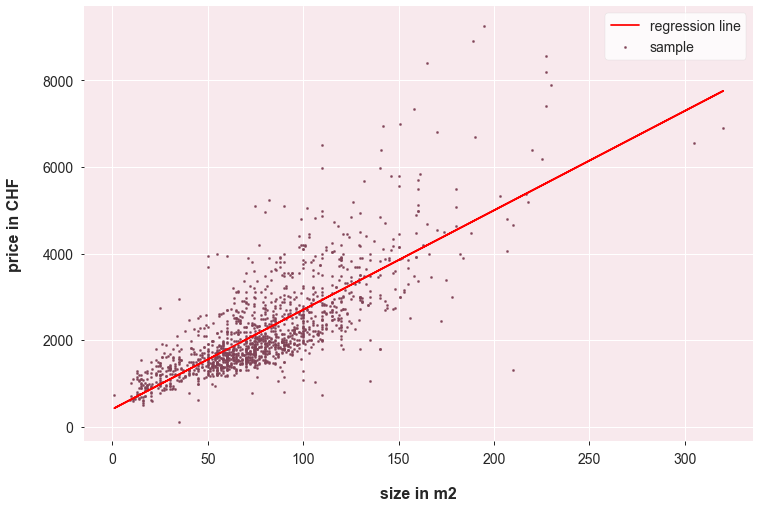

In [162]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0.933+0.04,0.8745+0.04,0.89+0.04)) ## white background

ax.tick_params(axis='both', labelsize=14)

plt.scatter(X, Y, s=5, color=(0.502, 0.266,0.341))
plt.plot(X, Y_pred, color='red')


plt.xlabel('size in m2', fontsize ='16', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('price in CHF', fontsize ='16', fontweight='bold', fontname="Arial", labelpad = 20)
plt.legend(['regression line', 'sample'],fontsize ='14',frameon= True, facecolor='white')
plt.savefig('./Figures/fig2_price_size.png', bbox_inches='tight')


#### 4.1.2 on room numbers

In [163]:
X = ds_corr['rooms']
Y = ds_corr['price']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * ds_corr['rooms']
print(round(slope,2))
round(p_value*100,2)

552.03


0.0

In [164]:
X = ds_corr['rooms']
Y = ds_corr['price']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * ds_corr['rooms']
print(round(slope,2))
round(p_value*100,3)

552.03


0.0

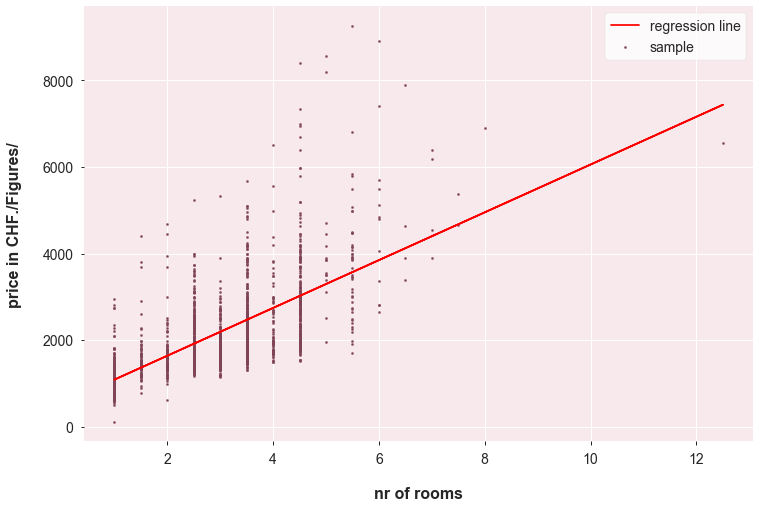

In [165]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0.933+0.04,0.8745+0.04,0.89+0.04)) ## white background

ax.tick_params(axis='both', labelsize=14)

plt.scatter(X, Y, s=5, color=(0.502, 0.266,0.341))
plt.plot(X, Y_pred, color='red')


plt.xlabel('nr of rooms', fontsize ='16', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('price in CHF./Figures/', fontsize ='16', fontweight='bold', fontname="Arial", labelpad = 20)
plt.legend(['regression line', 'sample'],fontsize ='14',frameon= True, facecolor='white')
plt.savefig('./Figures/fig3_price_room.png', bbox_inches='tight')

#### 4.1.3 on floor

In [166]:
ds_corr=ds[(ds['price'].isna()==False) & (ds['floor'].isna()==False) & (ds['price']<= 10000)& (ds['floor']<= 10)]
ds_corr.shape[0]

1740

In [167]:
X = ds_corr['floor']
Y = ds_corr['price']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * ds_corr['floor']
print(round(slope,2))
round(p_value*100,3)

51.05


0.02

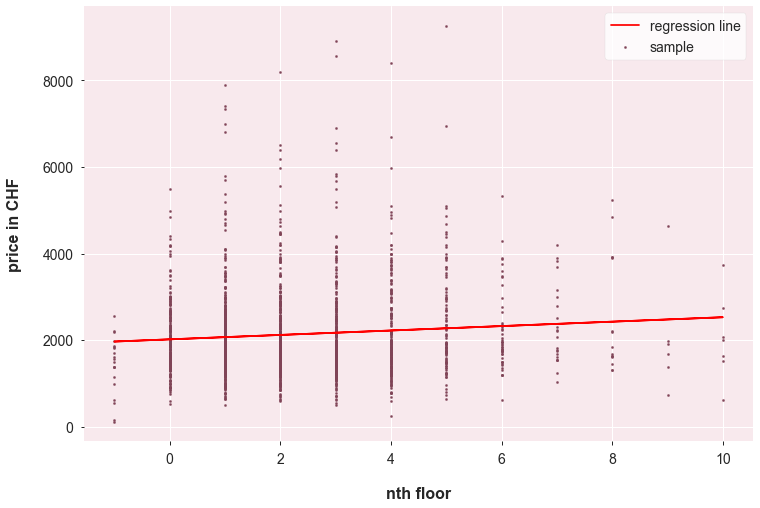

In [168]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0.933+0.04,0.8745+0.04,0.89+0.04)) ## white background

ax.tick_params(axis='both', labelsize=14)

plt.scatter(X, Y, s=5, color=(0.502, 0.266,0.341))
plt.plot(X, Y_pred, color='red')


plt.xlabel('nth floor', fontsize ='16', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('price in CHF', fontsize ='16', fontweight='bold', fontname="Arial", labelpad = 20)
plt.legend(['regression line', 'sample'],fontsize ='14',frameon= True, facecolor='white')
plt.savefig('./Figures/fig4_price_floor.png', bbox_inches='tight')

## 4.2 Multivariate Regression

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
ds_corr=ds[(ds['price'].isna()==False) & (ds['size'].isna()==False)& (ds['rooms'].isna()==False)& (ds['floor'].isna()==False) & (ds['price']<= 10000)& (ds['floor']<= 10)]
ds_corr.shape[0]

1446

In [145]:
Y = ds_corr['price']
X = ds_corr[['size', 'rooms','floor']]
lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)

Intercept:  359.5001431615524
Coef:  [22.73056022  5.7523902  19.56878744]


In [143]:
import statsmodels.api as sm
from scipy import stats

In [146]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     713.1
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          3.27e-284
Time:                        10:54:27   Log-Likelihood:                -11537.
No. Observations:                1446   AIC:                         2.308e+04
Df Residuals:                    1442   BIC:                         2.310e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        359.5001     53.119      6.768      0.0

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 5.extra

In [471]:
ds.columns

Index(['object_type', 'price', 'price_wo_extras', 'extras', 'size', 'rooms',
       'floor', 'moovIn', 'balcony', 'lift', 'public_transport', 'shopping',
       'rating', 'adress', 'publication_date', 'city', 'DateofScrapping',
       'age', 'parking_out', 'pets_allowed', 'tv', 'kids_ok', 'KG', 'PS', 'SS',
       'highway', 'parking_in'],
      dtype='object')

In [477]:
counts=ds[['balcony', 'lift', 'public_transport', 'shopping', 'parking_out', 'pets_allowed', 'tv', 'kids_ok', 'KG', 'PS', 'SS','highway', 'parking_in']].count()

In [482]:
counts.to_csv('./Data/counts.csv')

balcony             1172
lift                 879
public_transport     977
shopping             964
parking_out          356
pets_allowed         440
tv                   906
kids_ok              363
KG                   586
PS                   599
SS                   390
highway              411
parking_in           458
dtype: int64